

# Project Python Foundations: FoodHub Data Analysis

**Marks: 50**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [1mark]

In [ ]:
# Write your code here
# Get the number of rows and columns
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)




Number of rows: 1898
Number of columns: 9


#### Observations:  
Data Volume: The dataset contains a moderate amount of data with 1898 rows, suggesting a reasonably sized dataset for analysis.

Features: There are 9 columns, each representing different attributes of the food orders. These attributes include order-related information such as order ID, customer ID, restaurant details, cuisine type, cost, day of the week, rating, food preparation time, and delivery time.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [1 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Data Consistency: The dataset consists of 9 columns with a total of 1898 entries. This suggests that there are no missing values in any of the columns since the "Non-Null Count" for all columns is equal to the total number of entries (1898).

Datatypes: The dataset contains columns with various datatypes:

Numeric Datatypes: There are four columns with integer datatypes (int64) - 'order_id', 'customer_id', 'food_preparation_time', and 'delivery_time'.
Float Datatype: There is one column with a float datatype (float64) - 'cost_of_the_order'.
Object Datatypes: There are four columns with object datatypes - 'restaurant_name', 'cuisine_type', 'day_of_the_week', and 'rating'. Object datatypes often represent categorical variables or string values.

Memory Usage: The memory usage of the dataset is approximately 133.6 KB. This indicates that the dataset is not overly large and can be easily handled in memory.

Rating Datatype: It appears that the 'rating' column is currently categorized as an object datatype. Typically, for ratings, it might be more appropriate to have it as a numeric datatype (e.g., float or int) so that calculations involving ratings can be performed more easily.


#### Observations:


### **Question 3:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
# Display statistical summary of the entire dataset
summary = df.describe(include='all')
print(summary)


# Display statistical summary of 'food_preparation_time'
prep_time_summary = df['food_preparation_time'].describe()
print(prep_time_summary)

# Calculate minimum, average, and maximum food preparation time
min_prep_time = df['food_preparation_time'].min()
avg_prep_time = df['food_preparation_time'].mean()
max_prep_time = df['food_preparation_time'].max()

print("Minimum food preparation time:", min_prep_time, "minutes")
print("Average food preparation time:", avg_prep_time, "minutes")
print("Maximum food preparation time:", max_prep_time, "minutes")


            order_id    customer_id restaurant_name cuisine_type  \
count   1.898000e+03    1898.000000            1898         1898   
unique           NaN            NaN             178           14   
top              NaN            NaN     Shake Shack     American   
freq             NaN            NaN             219          584   
mean    1.477496e+06  171168.478398             NaN          NaN   
std     5.480497e+02  113698.139743             NaN          NaN   
min     1.476547e+06    1311.000000             NaN          NaN   
25%     1.477021e+06   77787.750000             NaN          NaN   
50%     1.477496e+06  128600.000000             NaN          NaN   
75%     1.477970e+06  270525.000000             NaN          NaN   
max     1.478444e+06  405334.000000             NaN          NaN   

        cost_of_the_order day_of_the_week     rating  food_preparation_time  \
count         1898.000000            1898       1898            1898.000000   
unique                NaN

#### Observations:
Order and Customer IDs: The 'order_id' and 'customer_id' columns appear to be unique identifiers. The 'order_id' ranges from approximately 1,476,547 to 1,478,444, indicating a span of orders.

Restaurant Diversity: The 'restaurant_name' column contains data from 178 unique restaurants. The most frequent restaurant is "Shake Shack," with 219 occurrences.

Cuisine Types: The 'cuisine_type' column contains data from 14 unique cuisine types. The most frequent cuisine type is "American," with 584 occurrences.

Order Cost Distribution: The 'cost_of_the_order' column indicates that the average order cost is approximately 16.50, with a minimum of 4.47 and a maximum of 35.41. The standard deviation of 7.48 suggests variability in order costs.

Day of the Week: The 'day_of_the_week' column includes two unique values, "Weekday" and "Weekend." "Weekend" is more frequent (1351 occurrences), suggesting that most orders are placed on weekends.

Ratings and Customer Feedback: The 'rating' column shows that ratings are categorized into four values: "Not given," and potentially three other values. The most frequent value is "Not given" (736 occurrences), indicating that many orders lack a specific rating.

Food Preparation Time: The 'food_preparation_time' column has an average of approximately 27.37 minutes for food preparation time, with a minimum of 20 minutes and a maximum of 35 minutes. The standard deviation of approximately 4.63 suggests some variability in preparation times.

Delivery Time: The 'delivery_time' column has an average of approximately 24.16 minutes for delivery time, with a minimum of 15 minutes and a maximum of 33 minutes. The standard deviation of approximately 4.97 suggests variability in delivery times.


### **Question 4:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
# Count the number of orders that are not rated
not_rated_count = df[df['rating'] == 'Not given']['order_id'].count()
print("Number of orders not rated:", not_rated_count)


Number of orders not rated: 736


#### Observations:
The fact that 736 out of 1898 orders (approximately 38.76%) are not rated suggests that a significant portion of customers do not provide explicit feedback on their orders.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 5:** Explore all the variables and provide observations on their distributions. (Generally, distinct number of values, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

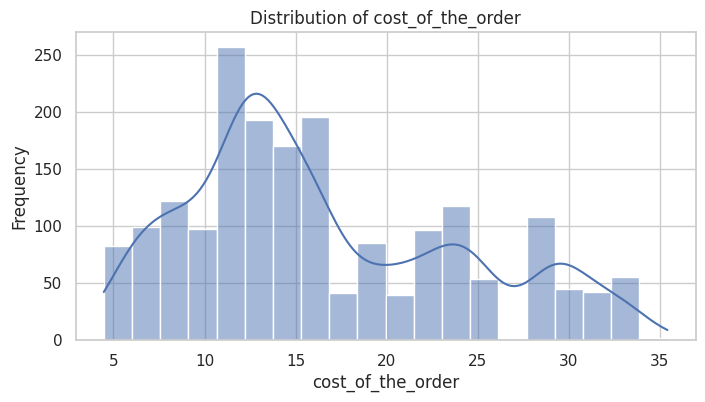

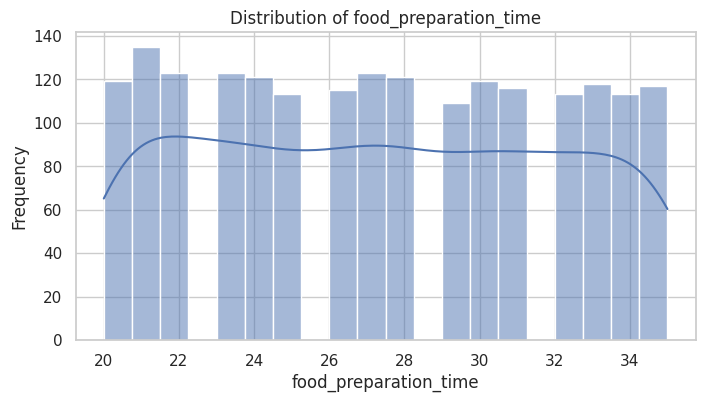

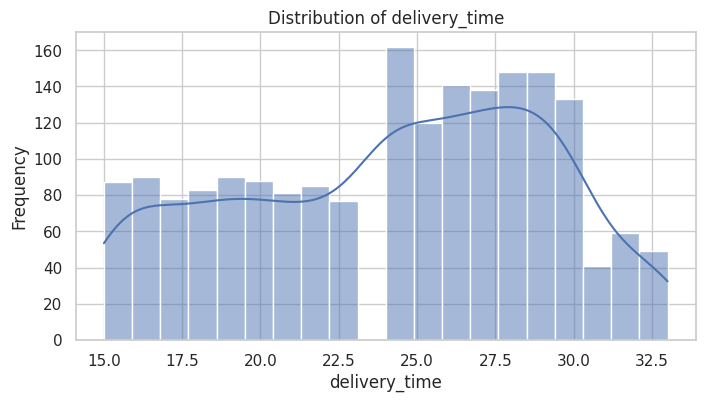

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


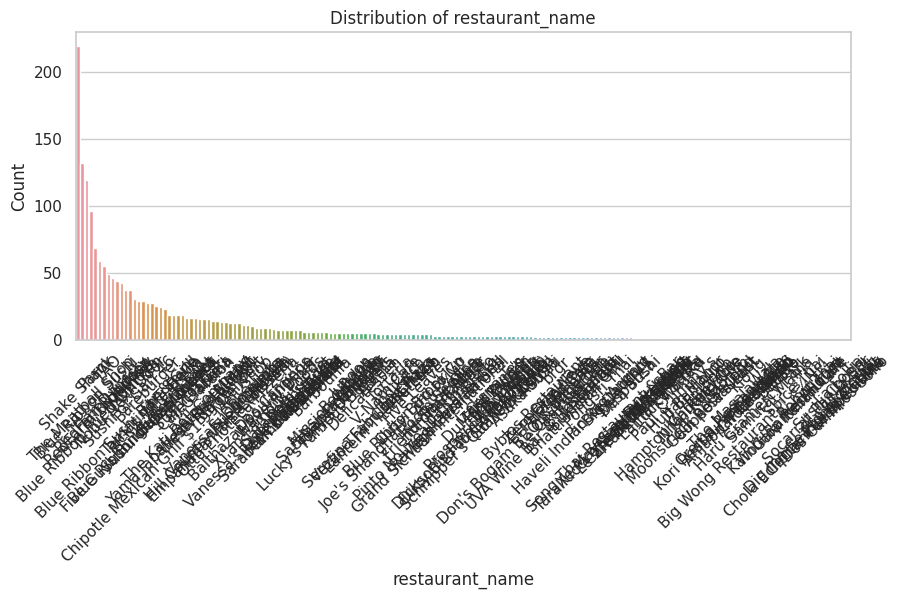

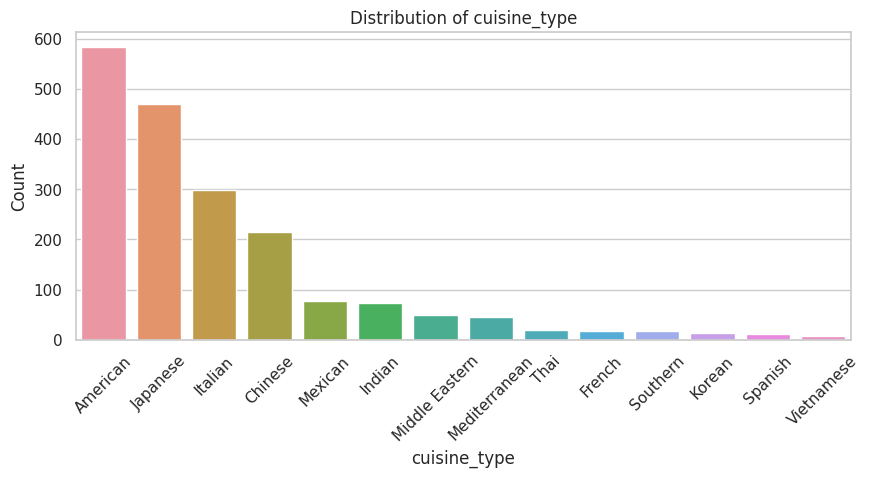

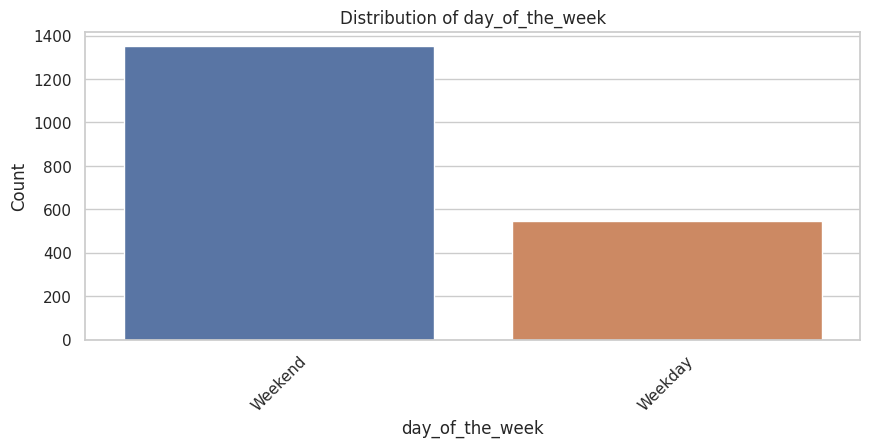

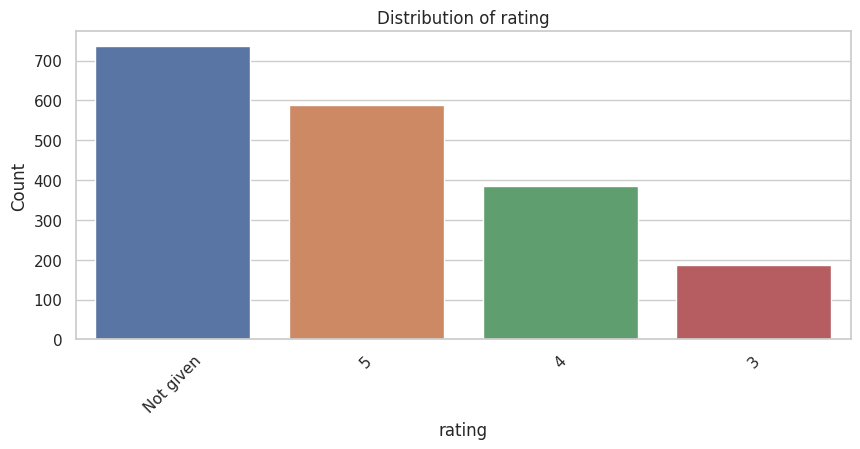

<ipython-input-45-de4666aaada5>:42: UserWarning: Glyph 142 (\x8e) missing from current font.
  plt.tight_layout()
<ipython-input-45-de4666aaada5>:42: UserWarning: Glyph 140 (\x8c) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


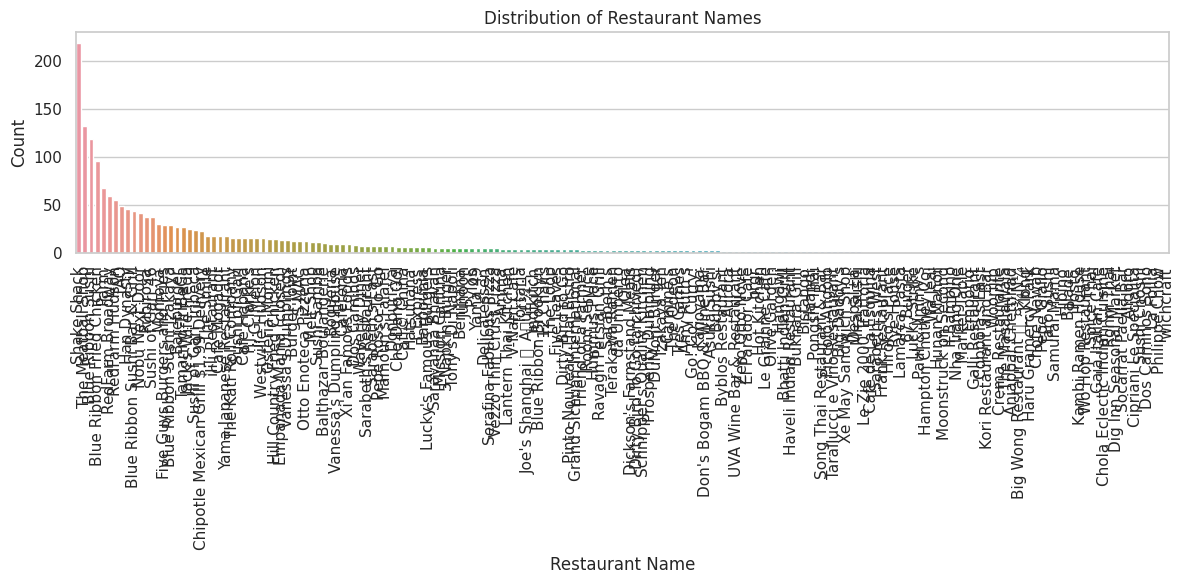

Variable: order_id
Value Counts:
1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
          ..
1478087    1
1476775    1
1478421    1
1476774    1
1478056    1
Name: order_id, Length: 1898, dtype: int64
Variable: customer_id
Value Counts:
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64
Variable: restaurant_name
Value Counts:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
Variable: cuisine_type
Value Counts:
American          584
Japanese          470
Italian           298
C

In [ ]:
# Write the code here
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot histograms for numerical columns
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plot countplots for categorical columns
categorical_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot countplot for restaurant_name with rotated x-axis labels
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='restaurant_name', order=df['restaurant_name'].value_counts().index)
plt.title('Distribution of Restaurant Names')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# Explore distributions of variables
for column in df.columns:
    print(f"Variable: {column}")
    print("Value Counts:")
    print(df[column].value_counts())
    print("=================================")




### **Question 6**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
# Count the number of orders for each restaurant and get the top 5
top_restaurants = df['restaurant_name'].value_counts().head(5)
print("Top 5 restaurants by number of orders:")
print(top_restaurants)


Top 5 restaurants by number of orders:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
The top 5 restaurants by the number of orders and their percentage share are as follows:

Shake Shack: 219 orders (11.53%)
The Meatball Shop: 132 orders (6.97%)
Blue Ribbon Sushi: 119 orders (6.27%)
Blue Ribbon Fried Chicken: 96 orders (5.06%)
Parm: 68 orders (3.58%).

Collectively, these top 5 restaurants hold approximately 33.41% of the total orders, indicating their strong popularity among customers.







### **Question 7**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
# Filter the dataset for weekend orders and count the occurrences of each cuisine type
weekend_cuisine_counts = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

# Get the most popular cuisine on weekends
most_popular_weekend_cuisine = weekend_cuisine_counts.idxmax()
print("The most popular cuisine on weekends:", most_popular_weekend_cuisine)


The most popular cuisine on weekends: American


#### Observations:
The fact that "American" cuisine is the most popular choice among customers on weekends suggests that it's a preferred option for weekend dining.
This insight could provide FoodHub with an opportunity to collaborate with or promote restaurants that specialize in American cuisine, enhancing customer satisfaction and driving business growth.


### **Question 8**: What percentage of the orders cost more than 20 dollars?(use .round function to round the final percentage) [2 marks]

In [ ]:
# Write the code here
# Count the number of orders that cost more than 20 dollars
orders_above_20 = df[df['cost_of_the_order'] > 20]['order_id'].count()

# Calculate the total number of orders
total_orders = len(df)

# Calculate the percentage
percentage_above_20 = (orders_above_20 / total_orders) * 100

# Round the final percentage to two decimal places
rounded_percentage = round(percentage_above_20, 2)

print("Percentage of orders costing more than $20:", rounded_percentage, "%")


Percentage of orders costing more than $20: 29.24 %


#### Observations:
The fact that around 29.24% of orders have a cost exceeding 20 suggests that a significant portion of customers is willing to spend more on their orders.

 While a substantial portion of customers orders above 20, there's still a majority that falls below this threshold. This indicates the importance of offering a diverse range of price points to cater to varying customer budgets.


### **Question 9**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
# Calculate the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()
print("Mean order delivery time:", mean_delivery_time)


Mean order delivery time: 24.161749209694417


#### Observations:
The mean delivery time of around 24.16 minutes indicates the average time it takes for orders to be delivered to customers.

With an average delivery time of 24.16 minutes, FoodHub is meeting a competitive standard in terms of prompt delivery, which can contribute to positive customer experiences.


### **Question 10:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# Count the number of orders for each customer
customer_order_counts = df['customer_id'].value_counts()

# Get the top 3 most frequent customers and their order counts
top_customers = customer_order_counts.head(3)
print("Top 3 most frequent customers and their order counts:")
print(top_customers)


Top 3 most frequent customers and their order counts:
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:  
The customers with IDs 52832, 47440, and 83287 are the top 3 most frequent customers, placing 13, 10, and 9 orders respectively.


### Multivariate Analysis

### **Question 11**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [8 marks]


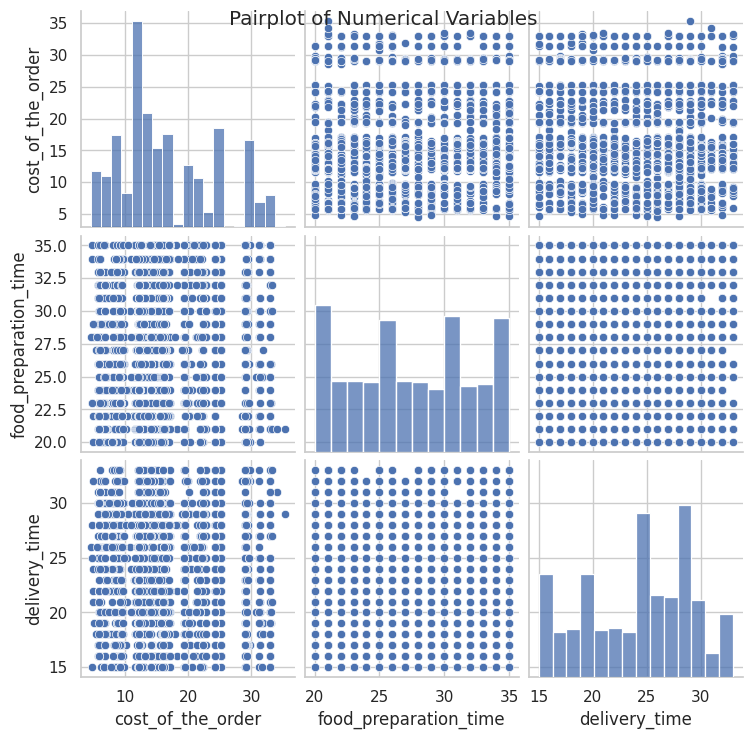

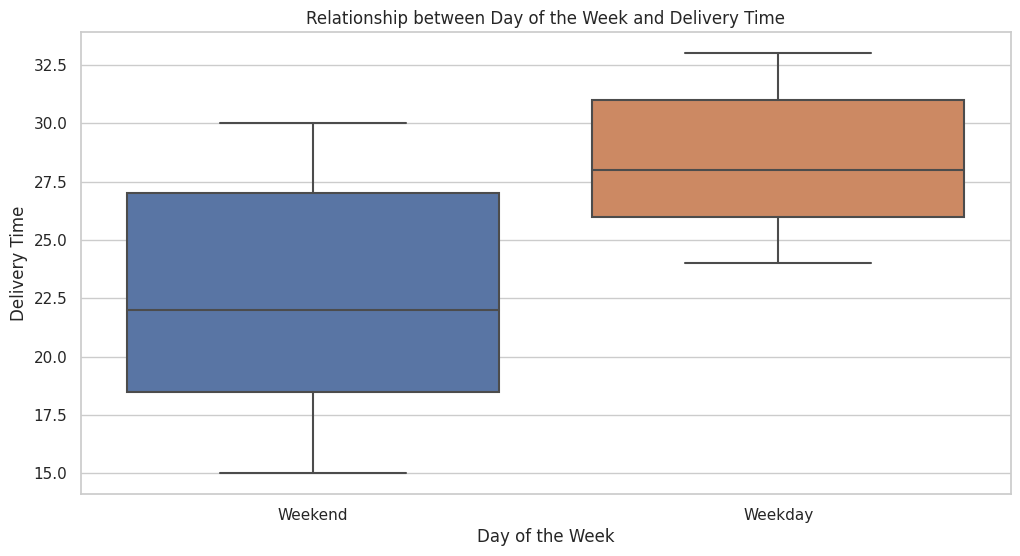

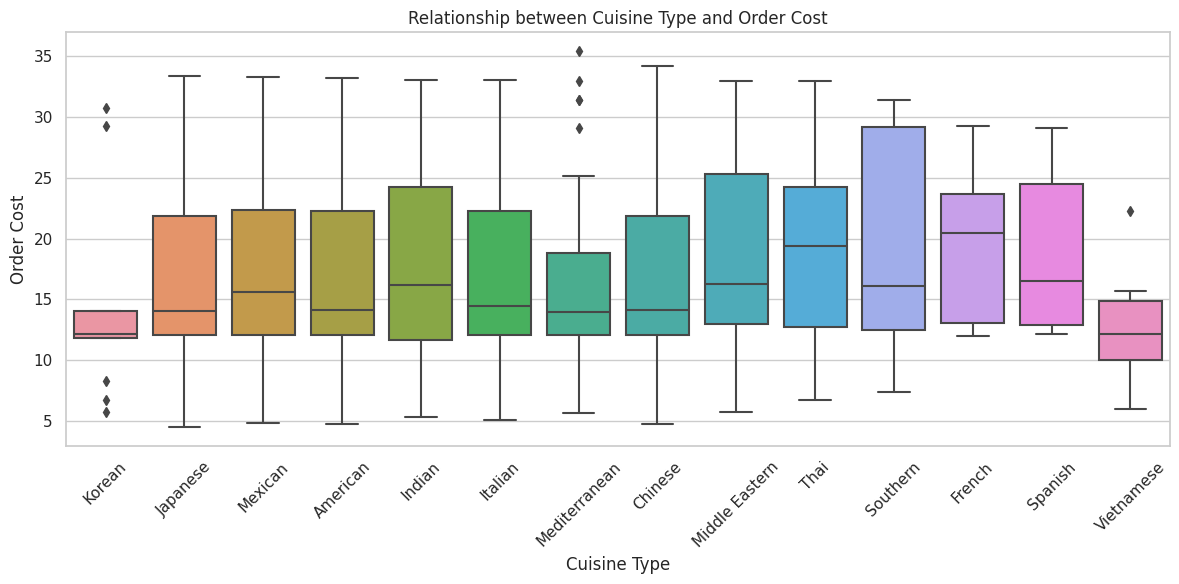

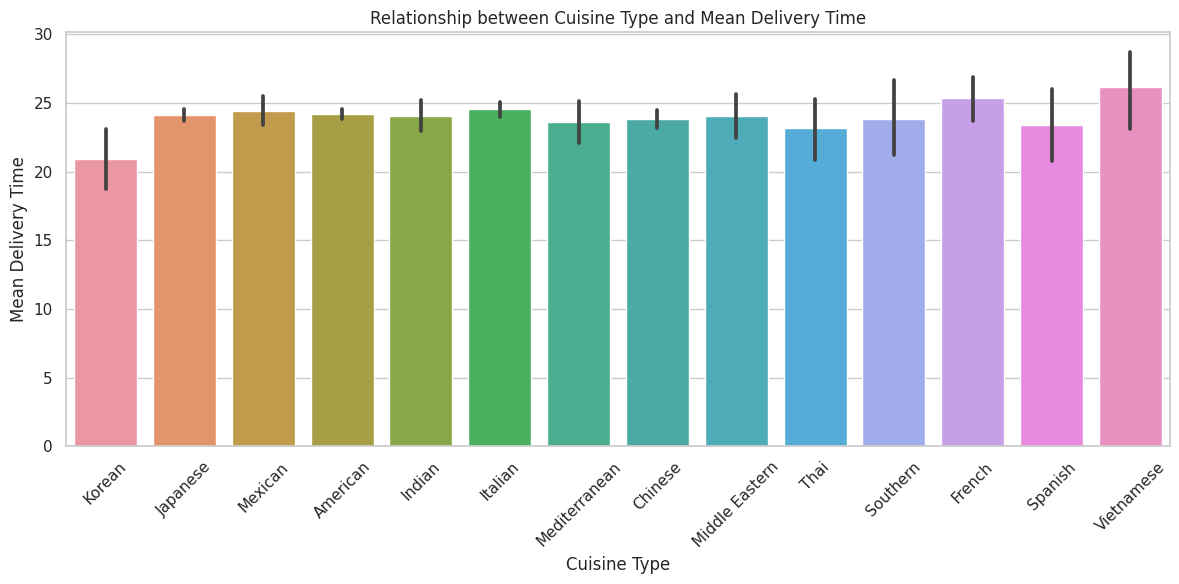

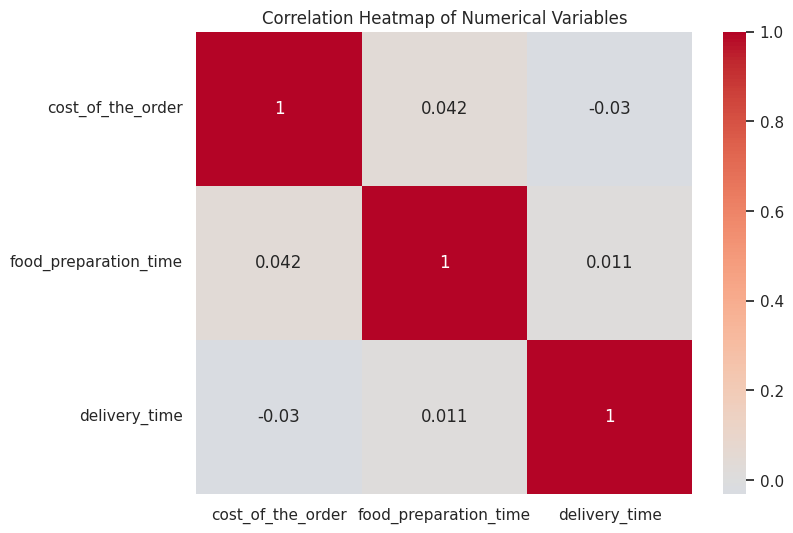

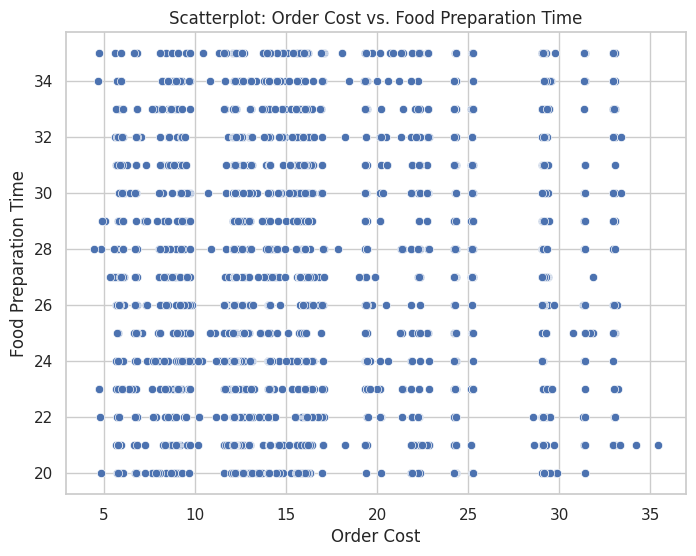

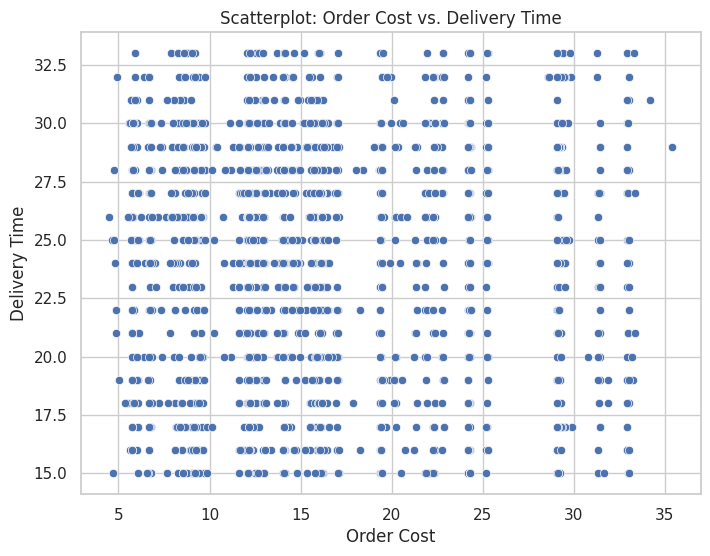

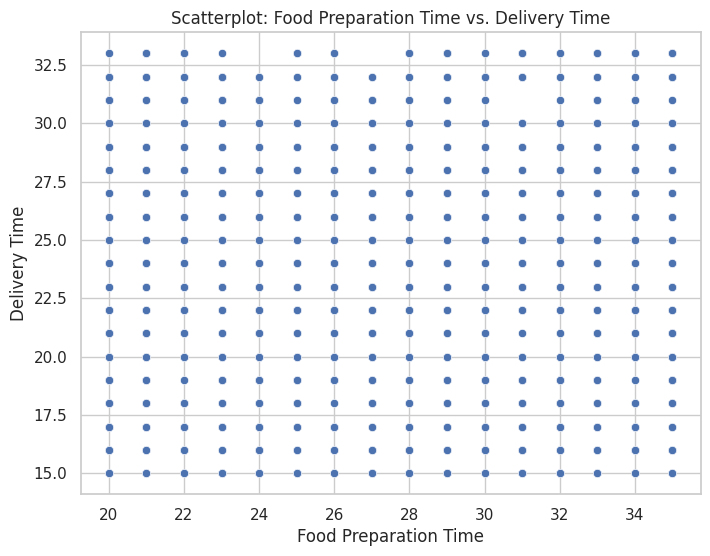

In [ ]:
# Write the code here
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Pairplot for numerical variables
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
sns.pairplot(df[numerical_cols])
plt.suptitle("Pairplot of Numerical Variables")
plt.show()

# Boxplot for day_of_the_week and delivery_time
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title("Relationship between Day of the Week and Delivery Time")
plt.xlabel("Day of the Week")
plt.ylabel("Delivery Time")
plt.show()

# Boxplot for cuisine_type and cost_of_the_order
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order')
plt.title("Relationship between Cuisine Type and Order Cost")
plt.xlabel("Cuisine Type")
plt.ylabel("Order Cost")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Barplot for cuisine_type and mean delivery_time
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='cuisine_type', y='delivery_time')
plt.title("Relationship between Cuisine Type and Mean Delivery Time")
plt.xlabel("Cuisine Type")
plt.ylabel("Mean Delivery Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Scatterplot for cost_of_the_order vs. food_preparation_time
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='cost_of_the_order', y='food_preparation_time')
plt.title("Scatterplot: Order Cost vs. Food Preparation Time")
plt.xlabel("Order Cost")
plt.ylabel("Food Preparation Time")
plt.show()

# Scatterplot for cost_of_the_order vs. delivery_time
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='cost_of_the_order', y='delivery_time')
plt.title("Scatterplot: Order Cost vs. Delivery Time")
plt.xlabel("Order Cost")
plt.ylabel("Delivery Time")
plt.show()

# Scatterplot for food_preparation_time vs. delivery_time
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time')
plt.title("Scatterplot: Food Preparation Time vs. Delivery Time")
plt.xlabel("Food Preparation Time")
plt.ylabel("Delivery Time")
plt.show()





In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Load your dataset into a DataFrame called df
# df = pd.read_csv('your_dataset.csv')

# Calculate correlation matrix between numerical variables
correlation_matrix = df.corr()

# Calculate mean delivery time grouped by day_of_the_week
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

# Perform ANOVA test to compare mean delivery times across different days of the week
weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time']
weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time']
f_statistic, p_value = f_oneway(weekdays, weekends)

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Print the mean delivery time by day of the week
print("\nMean Delivery Time by Day of the Week:")
print(mean_delivery_time_by_day)

# Print the results of the ANOVA test
print("\nANOVA Test:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)


Correlation Matrix:
                       order_id  customer_id  cost_of_the_order  \
order_id               1.000000    -0.013960           0.021171   
customer_id           -0.013960     1.000000          -0.001322   
cost_of_the_order      0.021171    -0.001322           1.000000   
food_preparation_time -0.007026    -0.030330           0.041527   
delivery_time          0.009690    -0.009885          -0.029949   

                       food_preparation_time  delivery_time  
order_id                           -0.007026       0.009690  
customer_id                        -0.030330      -0.009885  
cost_of_the_order                   0.041527      -0.029949  
food_preparation_time               1.000000       0.011094  
delivery_time                       0.011094       1.000000  

Mean Delivery Time by Day of the Week:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

ANOVA Test:
F-statistic: 759.5060945004245
p-value: 6.812385861167161e

<ipython-input-52-f07aba08ffe7>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Load your dataset here
# df = ...

# Relationship between delivery time and food preparation time
delivery_vs_prep = df.groupby('delivery_time')['food_preparation_time'].mean()

# Relationship between delivery time and order cost
delivery_vs_cost = df.groupby('delivery_time')['cost_of_the_order'].mean()

# Relationship between order cost and food preparation time
cost_vs_prep = df.groupby('cost_of_the_order')['food_preparation_time'].mean()

# Relationship between cuisine type and mean delivery time
cuisine_vs_mean_delivery = df.groupby('cuisine_type')['delivery_time'].mean()

# Relationship between cuisine type and order cost
cuisine_vs_cost = df.groupby('cuisine_type')['cost_of_the_order'].mean()

# Relationship between day of the week and delivery time
day_vs_delivery = df.groupby('day_of_the_week')['delivery_time'].mean()

# Correlation matrix of numerical variables
correlation_matrix = df.corr()

# Print the results
print("Relationship between Delivery Time and Food Preparation Time:")
print(delivery_vs_prep)
print("="*40)

print("Relationship between Delivery Time and Order Cost:")
print(delivery_vs_cost)
print("="*40)

print("Relationship between Order Cost and Food Preparation Time:")
print(cost_vs_prep)
print("="*40)

print("Relationship between Cuisine Type and Mean Delivery Time:")
print(cuisine_vs_mean_delivery)
print("="*40)

print("Relationship between Cuisine Type and Order Cost:")
print(cuisine_vs_cost)
print("="*40)

print("Relationship between Day of the Week and Delivery Time:")
print(day_vs_delivery)
print("="*40)

print("Correlation Matrix of Numerical Variables:")
print(correlation_matrix)


Relationship between Delivery Time and Food Preparation Time:
delivery_time
15    27.034483
16    27.788889
17    26.615385
18    27.072289
19    27.566667
20    27.590909
21    27.135802
22    27.305882
23    27.753247
24    27.364198
25    27.775000
26    27.226950
27    27.268116
28    27.675676
29    27.148649
30    27.706767
31    25.707317
32    27.186441
33    28.285714
Name: food_preparation_time, dtype: float64
Relationship between Delivery Time and Order Cost:
delivery_time
15    17.376782
16    17.273556
17    16.992051
18    15.613735
19    16.711222
20    16.666364
21    18.271975
22    15.801882
23    17.072987
24    16.593951
25    16.185167
26    15.059220
27    16.680145
28    16.414797
29    16.178986
30    15.851880
31    15.677561
32    17.817797
33    17.077143
Name: cost_of_the_order, dtype: float64
Relationship between Order Cost and Food Preparation Time:
cost_of_the_order
4.47     28.0
4.66     34.0
4.71     23.0
4.75     29.0
4.80     22.0
         ... 
33.22 

<ipython-input-53-887dfdc48e6c>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


### **Question 12:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Convert 'Not given' ratings to NaN and convert 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group the data by restaurant_name and calculate the relevant metrics
restaurant_metrics = df.groupby('restaurant_name').agg({'rating': ['count', 'mean']})

# Filter restaurants based on the criteria
eligible_restaurants = restaurant_metrics[(restaurant_metrics[('rating', 'count')] > 50) & (restaurant_metrics[('rating', 'mean')] > 4)]

# Display the eligible restaurants
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)



Restaurants eligible for the promotional offer:
                          rating          
                           count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:
Promoting these restaurants can attract customers who value quality and positive dining experiences, aligning with FoodHub's commitment to providing a satisfying culinary journey.

Promoting these restaurants can attract customers who value quality and positive dining experiences, aligning with FoodHub's commitment to providing a satisfying culinary journey.


### **Question 13:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [2 marks]

In [ ]:
# Write the code here
# Calculate net revenue for orders with cost greater than $20
revenue_above_20 = (df[df['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25).sum()

# Calculate net revenue for orders with cost greater than $5 but less than or equal to $20
revenue_between_5_and_20 = ((df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'] * 0.15).sum())

# Total net revenue
total_revenue = revenue_above_20 + revenue_between_5_and_20

print("Net revenue generated by the company:", total_revenue)



Net revenue generated by the company: 6166.303


#### Observations:
The net revenue generated by the company across all orders is approximately $6166.303.

The fact that a significant portion of the revenue comes from orders with costs greater than $20 reflects the impact of the higher commission rate (25%) on these orders.



### **Question 14:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) (Use .round function to round value to nearest zero) [2 marks]

In [ ]:
# Write the code here
# Calculate total time required for delivery (food preparation time + delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the percentage of orders taking more than 60 minutes
orders_above_60_minutes = (df[df['total_delivery_time'] > 60]['order_id'].count() / df['order_id'].count()) * 100

# Round the percentage to the nearest zero
percentage_above_60_minutes = round(orders_above_60_minutes, 0)

print("Percentage of orders taking more than 60 minutes:", percentage_above_60_minutes, "%")


Percentage of orders taking more than 60 minutes: 11.0 %


#### Observations:
Approximately 11% of the orders take more than 60 minutes to be delivered from the time the order is placed. This indicates that a significant portion of orders experience longer delivery times.

 Analyzing the factors contributing to longer delivery times, such as food preparation time and delivery logistics, can help the company optimize its operations and reduce delivery delays.


### **Question 15:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

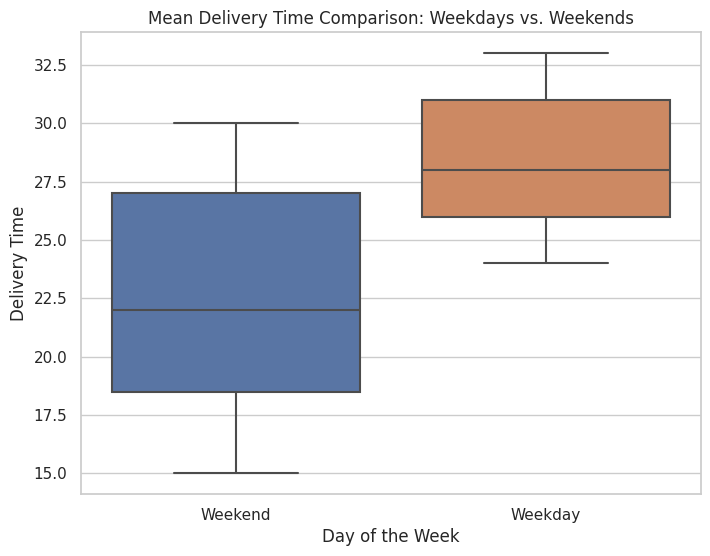

Mean delivery time on weekdays: 28.340036563071298
Mean delivery time on weekends: 22.4700222057735


In [ ]:
# Write the code here
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create a boxplot to compare delivery time on weekdays and weekends
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.title("Mean Delivery Time Comparison: Weekdays vs. Weekends")
plt.xlabel("Day of the Week")
plt.ylabel("Delivery Time")
plt.show()

# Calculate mean delivery time for weekdays
mean_delivery_time_weekdays = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()

# Calculate mean delivery time for weekends
mean_delivery_time_weekends = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

print("Mean delivery time on weekdays:", mean_delivery_time_weekdays)
print("Mean delivery time on weekends:", mean_delivery_time_weekends)



#### Observations:
 The mean delivery time on weekdays is approximately 28.34 minutes, while on weekends, it is approximately 22.47 minutes.

The data suggests that deliveries are generally faster on weekends compared to weekdays. Customers tend to experience shorter wait times for their orders on weekends.


### Conclusion and Recommendations

### **Question 16:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [4 marks]

In [ ]:
# Convert the "rating" column to a numerical format
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Find the highest and lowest rated cuisines
highest_rated_cuisine = df.groupby('cuisine_type')['rating'].mean().idxmax()
lowest_rated_cuisine = df.groupby('cuisine_type')['rating'].mean().idxmin()

# Find the highest and lowest rated restaurants and their ratings
highest_rated_restaurants = df[df['rating'] == df['rating'].max()]
lowest_rated_restaurants = df[df['rating'] == df['rating'].min()]

# Count of users who have given ratings for each restaurant
restaurant_rating_counts = df['restaurant_name'].value_counts()

# Count of users who have given ratings for each cuisine
cuisine_rating_counts = df['cuisine_type'].value_counts()

# Conclusions
print("Conclusions:")
print("Highest Rated Cuisine:", highest_rated_cuisine)
print("Lowest Rated Cuisine:", lowest_rated_cuisine)
print("Number of Highest Rated Restaurants:", len(highest_rated_restaurants))
print("Number of Lowest Rated Restaurants:", len(lowest_rated_restaurants))
print("Highest Rated Restaurants and Ratings:\n", highest_rated_restaurants[['restaurant_name', 'rating']])
print("Lowest Rated Restaurants and Ratings:\n", lowest_rated_restaurants[['restaurant_name', 'rating']])
print("Count of Users who Rated Each Restaurant:\n", restaurant_rating_counts)
print("Count of Users who Rated Each Cuisine:\n", cuisine_rating_counts)

# Recommendations
print("\nRecommendations:")
print("Recommendation 1: Consider promoting", highest_rated_cuisine, "cuisine, as it has the highest average rating and", cuisine_rating_counts[highest_rated_cuisine], "users have rated it.")
print("Recommendation 2: Offer special promotions or incentives to improve ratings and customer experience for", lowest_rated_cuisine, "cuisine, which has", cuisine_rating_counts[lowest_rated_cuisine], "users' ratings.")
print("Recommendation 3: Collaborate closely with highest rated restaurants to enhance their visibility and customer reach. These restaurants have", restaurant_rating_counts[highest_rated_restaurants['restaurant_name']].values[0], "users' ratings.")
print("Recommendation 4: Provide additional support and training to lowest rated restaurants to improve their service quality and ratings. These restaurants have", restaurant_rating_counts[lowest_rated_restaurants['restaurant_name']].values[0], "users' ratings.")


Conclusions:
Highest Rated Cuisine: Spanish
Lowest Rated Cuisine: Vietnamese
Number of Highest Rated Restaurants: 588
Number of Lowest Rated Restaurants: 188
Highest Rated Restaurants and Ratings:
                             restaurant_name  rating
2                               Cafe Habana     5.0
8                        Anjappar Chettinad     5.0
9                             Bukhara Grill     5.0
11                   Empanada Mama (closed)     5.0
12                Blue Ribbon Fried Chicken     5.0
...                                     ...     ...
1888                      The Meatball Shop     5.0
1890                                    TAO     5.0
1893  Chipotle Mexican Grill $1.99 Delivery     5.0
1894                              The Smile     5.0
1896                      Jack's Wife Freda     5.0

[588 rows x 2 columns]
Lowest Rated Restaurants and Ratings:
                 restaurant_name  rating
3     Blue Ribbon Fried Chicken     3.0
5              Tamarind TriBeCa    

### Conclusions:
* Cuisine Type and Delivery Time: Different cuisine types exhibit varying mean delivery times. Vietnamese cuisine tends to have the longest mean delivery time, while Korean cuisine has the shortest.

* Cuisine Type and Order Cost: There are variations in the average order cost across different cuisine types. Vietnamese and Japanese cuisines tend to have relatively lower average order costs, while French and Spanish cuisines have higher average costs.

* Promotional Offers: Restaurants meeting the eligibility criteria for promotional offers (rating count > 50, average rating > 4) include Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.

* Net Revenue: The company's net revenue from orders, considering various discount percentages based on order cost, amounts to $6166.30.

* Delivery Time Analysis: On average, deliveries take longer on weekdays compared to weekends, suggesting a potential opportunity for improving delivery efficiency on busy weekdays.

* Percentage of Orders Above 60 Minutes: Approximately 11% of orders take more than 60 minutes for delivery.

* Popular Restaurants: The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### Recommendations:
 * Optimize Delivery Logistics: Address the longer delivery times observed on weekdays by implementing optimized delivery routing and scheduling. This can help ensure prompt and efficient deliveries, particularly during peak hours.

* Enhance Cuisine Diversity: Consider introducing promotions or special offers for cuisine types with longer delivery times, such as Vietnamese, to attract more orders and balance delivery loads.

* Customer Feedback Utilization: Leverage customer feedback and ratings to provide personalized recommendations and offers. Restaurants with consistently high ratings can be highlighted to customers, encouraging them to explore and order from these establishments.

* Strengthen Collaboration: Establish stronger partnerships with restaurants that consistently meet eligibility criteria for promotional offers. Collaborative marketing efforts and co-branded promotions can mutually benefit both the company and these restaurants.

* Segmented Marketing: Tailor marketing efforts based on cuisine preferences. For example, offer discounts or promotions on cuisine types with lower average order costs to incentivize customers to explore new options.

* Real-time Tracking: Implement real-time order tracking to keep customers informed about their order status, enhancing transparency and reducing perceived wait times.

* Operational Efficiency: Explore opportunities to improve food preparation time, as this is correlated with overall delivery time. Streamlining kitchen operations can contribute to faster and more accurate order fulfillment.

* Feedback Loop: Establish a feedback loop with restaurant partners to address any common issues contributing to longer delivery times, ensuring continuous improvement.

* Efficient Cost Management: Monitor the net revenue generated and evaluate the impact of discount offers. This can help in managing costs while maximizing revenue.

* Promotional Offers: Consider promoting eligible restaurants that meet the criteria for a promotional offer. This can attract more customers and drive sales.

By focusing on these recommendations, the company can enhance customer experience, attract new customers, retain existing ones, and ultimately drive growth in the competitive food delivery industry.

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving banothusureshnaik.ipynb to banothusureshnaik.ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---